### Baseball Data Analysis

### Question
1) How did players' salaries change over the time in two different leagues?
2) What factors have critical impact on the player salary in two different leagues?

### Wrangling  Sketch
I started my analysis via data wrangling on the data. I went trough the README file in order to figure out which of the dataset had relevant information and also what are the common parametrs between them to answer the above questions.
I have chosen "Appearances.csv", "Salaries.csv", "Teams.csv" and have merged and creat different tables with these data which I explained them below in their apropriate cells. 
For cleaning part of the data wrangling, all the analyses throughout my report are restricted to the period of 1985-2014. I have also seperated two leagues, and then merge them by their common keys.

### Exploring the Data
In this report, I consider three layers: league level, team level, and player level. Impact of salaries paid by teams, number of attendees, and players' physical chracteristics are the main focus of my report. In general, the independent variables are: year, number of attendees, player's role in the field, player's body-mass index, and player's age. The dependent variables are number of games won, total (team) salaries, and player's salary.




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
appearance = pd.read_csv("Appearances.csv")
salary = pd.read_csv("Salaries.csv")
def filter_year (data):
    data_filtered = data[data["yearID"]>=1985]
    return data_filtered
appearance_filtered = filter_year(appearance)
salary_filtered = filter_year(salary)


In [25]:
#merging 2 tables, salary and appearance
salary_appearance = pd.merge(appearance_filtered,salary_filtered, how='inner',\
                             on = ['yearID',"playerID","teamID","lgID"] )
salary_appearance.drop(["G_of","G_dh","G_pr"],inplace=True,axis=1)
def filter_lgID (data,lgid):
    data_filtered = data[data['lgID']==lgid]
    return data_filtered
salary_appearance_NL = filter_lgID(salary_appearance,"NL")
salary_appearance_AL = filter_lgID(salary_appearance,"AL")

salary_appearance_AL.head(3)


,yearID,teamID,lgID,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_ph,salary
21,1985,BAL,AL,boddimi01,34.0,0.0,2,32.0,32,0,0,0,0,0,0,0,0,0.0,625000
22,1985,BAL,AL,dauerri01,85.0,71.0,85,85.0,0,0,1,73,17,0,0,0,0,1.0,480000
23,1985,BAL,AL,davisst02,31.0,0.0,0,31.0,31,0,0,0,0,0,0,0,0,0.0,437500


### How the salaries have changed in AL and NL baseball leagues


Here, I am computing the median of the total salaries paid by teams over the years in the two leagues.
As we can see in the figure below there is a significant jump from year 1998 to 2001, by 122% 201% for AL and NL leagues, respectively.
This finding suggests that, even though the growth is almos positive in the last 30 years, there has been a major shift in investments in baseball in early 2000.

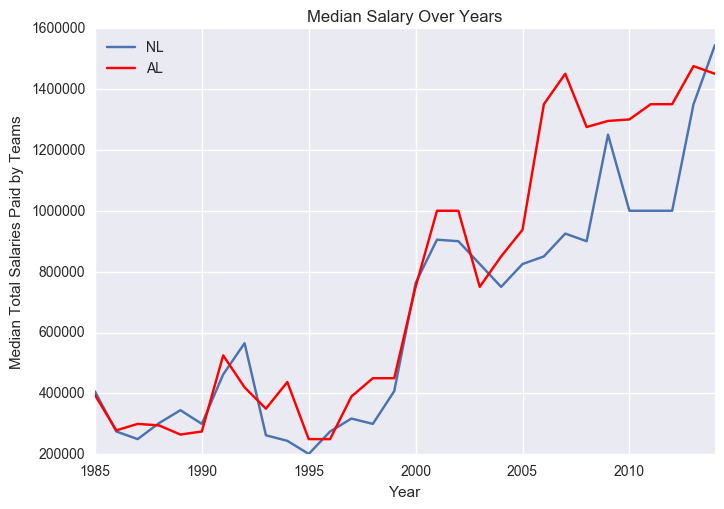

In [26]:
##  Here I am analysing how the salary of player changes 
## over the years (1985-2014)
salary_appearance_NL_grouped = salary_appearance_NL.groupby("yearID",as_index=False)["salary"]\
.agg({'sum': np.sum,'mean': np.average,'median':np.median})
salary_appearance_AL_grouped = salary_appearance_AL.groupby("yearID",as_index=False)["salary"]\
.agg({'sum': np.sum,'mean': np.average,'median':np.median})


ax = salary_appearance_NL_grouped.plot(x='yearID', y='median', kind='line', xlim=[1985, 2014])
salary_appearance_AL_grouped.plot(ax=ax,x='yearID', y='median', kind='line', xlim=[1985, 2014],title ="Median Salary Over Years",color="red")
ax.set_xlabel("Year")
ax.set_ylabel("Median Total Salaries Paid by Teams")


ax.legend(["NL","AL"],loc ="best")


### Gap in Salaries
Here I am analyzing the gap between the highest salary to the median in the whole league.
In order to explore this factor I plotted the ratioe between maximum to the median salary over the last 30 years. As it can be infered from the figure below, this gap had been very small before 1993 where the ratio is closed to 10. However after that period this gab began to rise up to the very high number of 50 in th NL league. Fortunately, since then this gap has been stabilized and in the last 5 years it has reached 20 and it seems that the trend shows a decreasing gap.


   yearID teamID lgID   playerID  G_all    GS  G_batting  G_defense  G_p  G_c  \
0    1985    ATL   NL  barkele01   20.0  18.0         20       20.0   20    0   
1    1985    ATL   NL  bedrost01   37.0  37.0         37       37.0   37    0   
2    1985    ATL   NL  benedbr01   70.0  67.0         70       70.0    0   70   

   G_1b  G_2b  G_3b  G_ss  G_lf  G_cf  G_rf  G_ph  salary major_role  
0     0     0     0     0     0     0     0   0.0  870000        G_p  
1     0     0     0     0     0     0     0   0.0  550000        G_p  
2     0     0     0     0     0     0     0   0.0  545000        G_c  
    yearID teamID lgID   playerID  G_all    GS  G_batting  G_defense  G_p  \
21    1985    BAL   AL  boddimi01   34.0   0.0          2       32.0   32   
22    1985    BAL   AL  dauerri01   85.0  71.0         85       85.0    0   
23    1985    BAL   AL  davisst02   31.0   0.0          0       31.0   31   

    G_c  G_1b  G_2b  G_3b  G_ss  G_lf  G_cf  G_rf  G_ph  salary major_role  
21   

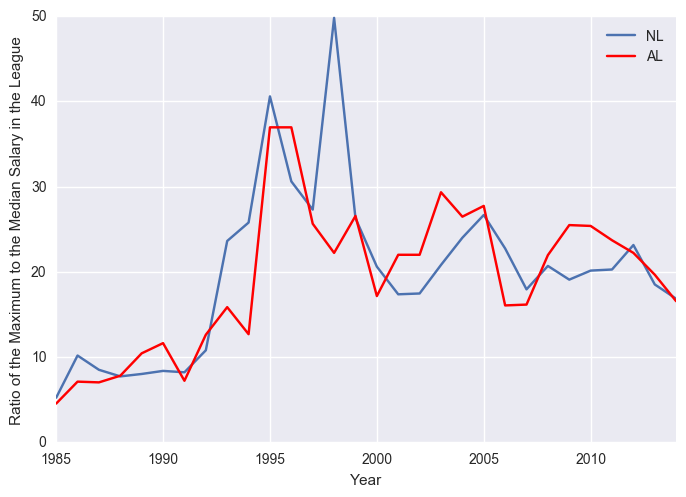

In [27]:

### NEW:analyzing range of salary for major roles for each Player ID
positions_list = ["G_p","G_c","G_1b","G_2b","G_3b","G_ss","G_lf","G_cf","G_rf"]
def major_role(row):
    row["major_role"] = row[positions_list].idxmax(axis='columns')    
    return(row)

salary_appearance_NL_with_major_roles = salary_appearance_NL\
.groupby(["yearID"], as_index=False).apply(major_role)
salary_appearance_AL_with_major_roles = salary_appearance_AL\
.groupby (["yearID"],as_index=False).apply(major_role)
def range_salary(x):
    return((np.max(x))/np.median(x))
#[salary_appearance_NL_with_major_roles["major_role"]=="G_p"]
some_satats_for_salary_changes_NL = salary_appearance_NL_with_major_roles\
.groupby("yearID",as_index=False)["salary"].agg({'max': np.max, 'median':\
                                                 np.median,'max2median': range_salary})
some_satats_for_salary_changes_AL = salary_appearance_AL_with_major_roles.\
groupby("yearID",as_index=False)["salary"].agg({'max': np.max, \
                                                'median': np.median,'max2median': range_salary})

print (salary_appearance_NL_with_major_roles.head(3))
print (salary_appearance_AL_with_major_roles.head(3))
ax = some_satats_for_salary_changes_NL.plot(x='yearID', y='max2median', kind='line',\
                                            xlim=[1985, 2014])
some_satats_for_salary_changes_AL.plot(ax=ax,x='yearID', y='max2median', kind='line',\
                                       xlim=[1985, 2014],color="red")
ax.legend(["NL","AL"],loc ="best")
ax.set_xlabel("Year")
ax.set_ylabel("Ratio of the Maximum to the Median Salary in the League")

### Effect of Number of Attendees on Teams' Performance
Next, I find the correlation between the number of attendees and the numbur of games the team wins where my hoypothesis was to see a high correlation between these two variables.
Based on the data the Pearson correlation becam 0.46 and 0.55 for NL and AL leagues respectively. The scatter plots are also shown below.

('NL Correlation:', 0.46000735220091304, 'AL Correlation:', 0.54626563670513706)


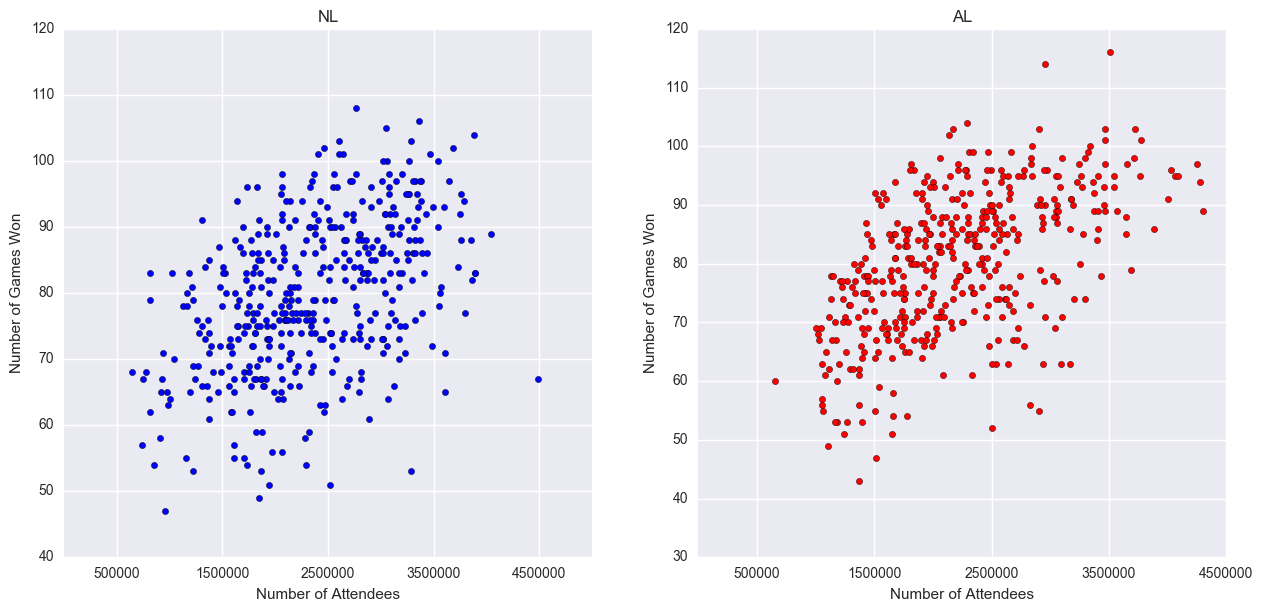

In [28]:
teams = pd.read_csv("Teams.csv")
teams_filtered = filter_year(teams)[["yearID","lgID","teamID","franchID"\
                                     ,"Rank","G","W","L","attendance"]]
teams_salary = pd.merge(teams_filtered,salary_filtered, how='inner',\
                        on = ['yearID',"teamID","lgID"] )

def add_average(grp):
    grp['total pay'] = grp['salary'].sum()
    return grp
def extract(grp):
    out = grp[["Rank","total pay","attendance"]]
    out = out.iloc[0]
    out["Rank"] = grp.iloc[0]["Rank"]
    out["total pay"] = (grp.iloc[0]["total pay"])
    out["W2G"] = (grp.iloc[0]["W"])#/(grp.iloc[0]["G"])
    return out

#total_pay_teams_NL.groupby(["yearID","teamID","lgID"])["W2G","Rank","total pay"]



fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,15))
def plot_scatter_leagues(axes,league_str,rownum,colnum,colour):
    input_df = filter_lgID(teams_salary,league_str)
    total_pay_df = input_df.groupby(["yearID","teamID","lgID"],as_index=False).\
    apply(add_average)
    y = total_pay_df.groupby(["yearID","teamID","lgID"],as_index=False).apply(extract)
    cor_pay_rank = y['W2G'].corr(y["attendance"])
    ax = axes[colnum]
    y.plot(x="attendance",y='W2G', kind="scatter",ax=axes[colnum],color=colour,\
           title=league_str,xticks=np.arange(5e5,5e6,1e6))
    ax.set_xlabel("Number of Attendees")
    ax.set_ylabel("Number of Games Won")
    ax.set_aspect(1./ax.get_data_ratio())
    return(cor_pay_rank)
a = plot_scatter_leagues(axes,"NL",0,0,"blue")

b = plot_scatter_leagues(axes,"AL",0,1,"red")

print("NL Correlation:",a ,"AL Correlation:",b )


### Effect of Players' Salaries on Teams' Performance
In this part, I investigated how pelayer's salaries can affect team's performance. 
Therefore, I found the total payments for each team and calculated its correlation with the number of games won by the team. Illusterated from the figures below, one can conclude that due to a weaker correlation here, probably the number of attendees in a game has more impact on the performance compared to the palyers' salaries. 

('NL Correlation:', 0.21929235690141421, 'AL Correlation:', 0.27871170351306851)


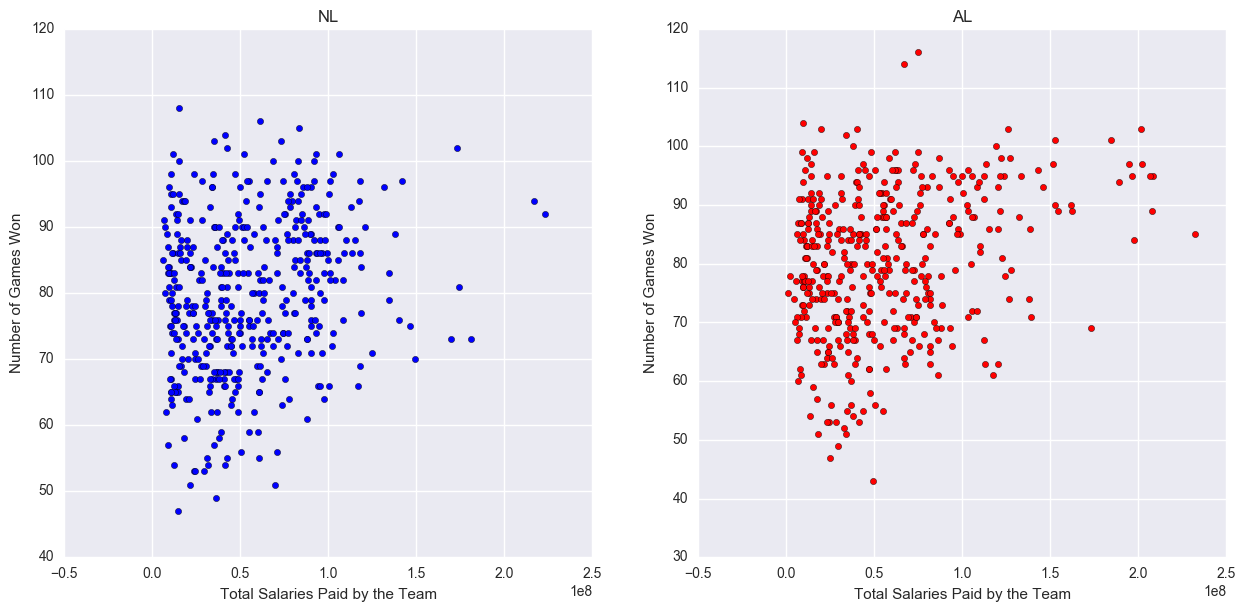

In [29]:
## investigation about relation between total pay and rank. lgID= AL


def add_average(grp):
    grp['total pay'] = grp['salary'].sum()
    return grp


fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,15))
def plot_scatter_leagues(axes,league_str,rownum,colnum,colour):
    
    teams_salary_curr = filter_lgID(teams_salary,league_str)
    total_pay_teams_curr= teams_salary_curr.groupby(["yearID","teamID","lgID"],as_index=False)\
    .apply(add_average)
    y = total_pay_teams_curr.groupby(["yearID","teamID","lgID"],as_index=False).apply(extract)
    cor_pay_rank_curr = y['W2G'].corr(y["total pay"])
    ax = axes[colnum]
    y.plot(x="total pay",y='W2G', kind="scatter",ax=axes[colnum],color=colour,title=league_str)
    ax.set_xlabel("Total Salaries Paid by the Team")
    ax.set_ylabel("Number of Games Won")
    ax.set_aspect(1./ax.get_data_ratio())
    return(cor_pay_rank_curr)
a = plot_scatter_leagues(axes,"NL",0,0,"blue")

b = plot_scatter_leagues(axes,"AL",0,1,"red")

print("NL Correlation:",a ,"AL Correlation:",b )



### Field Positions of the Highest Paid Players
In this part, first I found the highest paid players in the entire season. 
Then, I defined the major role of each player as the position in which he has appeared the most throughout the season. For example, if player i has played 60% of the games in position G_3b, 30% in position G_1b, and 10% in G_ss, I define his "major role" as G_3b. Doing so, for all the players, I could find the position associated with each player. Then, I explored what are the roles of the highest paid players. 

According to the data, in league NL, the highest paid players in the last 5 years have been mostly in position G_p, while in league AL it has been G_3b!

Moreover, I plotted the boxplots of the salaries grouped by different roles for the highest paid players.

    yearID teamID   playerID major_role    salary lgID
25    2010    NYA  rodrial01       G_3b  33000000   AL
26    2011    NYA  rodrial01       G_3b  32000000   AL
27    2012    NYA  rodrial01       G_3b  30000000   AL
28    2013    NYA  rodrial01       G_3b  29000000   AL
29    2014    SEA   canoro01       G_2b  24000000   AL
    yearID teamID   playerID major_role    salary lgID
25    2010    NYN  santajo01        G_p  20144707   NL
26    2011    COL  heltoto01       G_1b  20275000   NL
27    2012    NYN  santajo01        G_p  23145011   NL
28    2013    PHI    leecl02        G_p  25000000   NL
29    2014    LAN  greinza01        G_p  26000000   NL


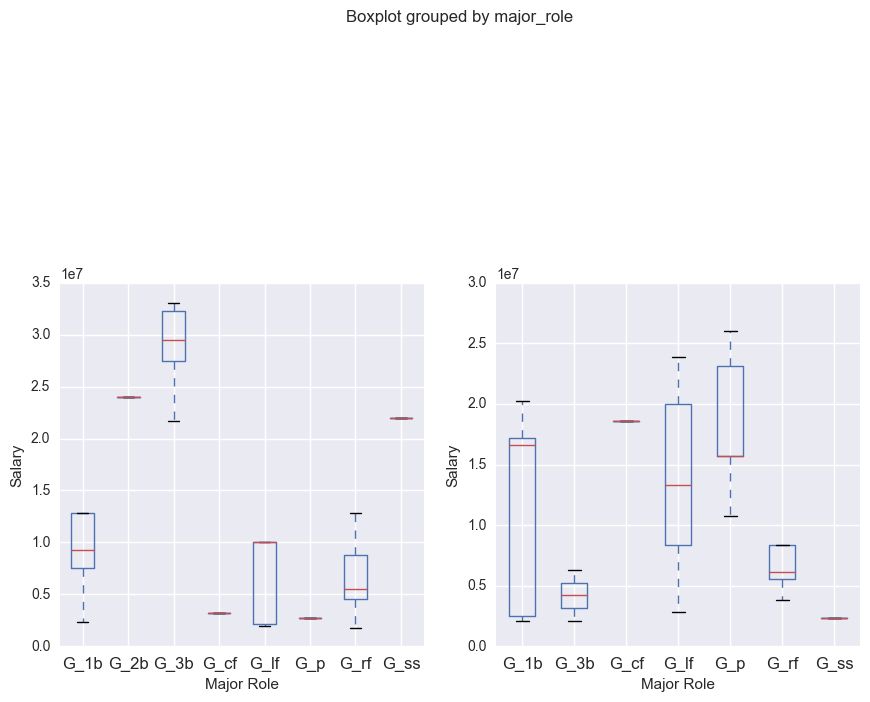

In [21]:
########  Here I am finidng the major role associated with the maximum salary in each yr!
positions_list = ["G_p","G_c","G_1b","G_2b","G_3b","G_ss","G_lf","G_cf","G_rf"]
def major_role(row):
    row["major_role"] = row[positions_list].idxmax(axis='columns')    
    return(row)
def finding_max_salary(data_f):
    max_salary= data_f["salary"].max() 
    data_f_new = data_f[["yearID","teamID","playerID","major_role","salary","lgID"]]
    max_playerID_index = data_f_new["salary"].idxmax(axis='rows')
    return(data_f_new.loc[max_playerID_index])
max_salary_AL_major_role_grouped = salary_appearance_AL_with_major_roles.\
groupby(["yearID"],as_index=False).apply(finding_max_salary)
max_salary_NL_major_role_grouped = salary_appearance_NL_with_major_roles.\
groupby(["yearID"],as_index=False).apply(finding_max_salary)
print(max_salary_AL_major_role_grouped.tail(5))
print(max_salary_NL_major_role_grouped.tail(5))
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,10))
ax_1=axes[0]
max_salary_AL_major_role_grouped.boxplot(column='salary', by='major_role',ax=ax_1)
ax_1.set_aspect(1./ax_1.get_data_ratio())
ax_1.set_title('')
ax_1.set_ylabel('Salary')
ax_1.set_xlabel('Major Role')
ax_2=axes[1]
max_salary_NL_major_role_grouped.boxplot(column='salary', by='major_role',ax=ax_2)
ax_2.set_aspect(1./ax_2.get_data_ratio())
ax_2.set_title('')
ax_2.set_ylabel('Salary')
ax_2.set_xlabel('Major Role')


### Correlation between Player's Physical Characteristics and His Salary when Restricted to Highest Paid Players
In this part, I consider two physical characteristics of a player, and their correlation with player's salary. 
The two physical characteristics are : 1- Body-Max Index (BMI): the ratio of weight to height, 2- Age.
In this part, I restrict the analysis to the highest paid players, later I extend this analysis to all the players. 

First, my question was: what is the relationship between age and the salary of a player? In order to understand this question, I found the correlation between the two factors, and realized that the correlations were 0.12 and 0.28 for AL and NL leagues, respectively. 

Next, I asked: what is the relationship between BMI and the salary? Similar to above, I found the correlation as a factor showing the relationship. Here, the correlations were much higher: 0.69 and 0.52, respectively for AL and NL. 

Hence, my conclusion here was that there is a stronger correlation between players' BMI and his salary, meaning that as long as a player is in a good physical shape, regardless of his age, he can maintain a high salary.

In [30]:
master = pd.read_csv("Master.csv")
#Master_filtered = filter_year(master)
master_filtered= master[["playerID","birthYear","birthCountry","birthState","weight","height"]]

salary_master_NL = pd.merge(master_filtered,max_salary_NL_major_role_grouped,\
                            how='inner', on = ["playerID"])
salary_master_AL = pd.merge(master_filtered,max_salary_AL_major_role_grouped,\
                            how='inner', on = ["playerID"])

#max_salary_AL_major_role_grouped
salary_master_AL.head()
#salary_filtered

def age_player_BMI(data):
    data["player_age"] = (data["yearID"]-data["birthYear"])
    data["Body_Mas_Index"]= (data["weight"]/((data["height"])**2))*703
    return (data)
salary_master_NL_age_bmi= salary_master_NL.groupby(["playerID","lgID"],as_index=False)\
.apply(age_player_BMI)
salary_master_AL_age_bmi= salary_master_AL.groupby(["playerID","lgID"],as_index=False)\
.apply(age_player_BMI)
cor_salary_age_NL =  salary_master_NL_age_bmi['salary'].\
corr(salary_master_NL_age_bmi["player_age"])
cor_salary_age_AL =  salary_master_AL_age_bmi['salary'].\
corr(salary_master_AL_age_bmi["player_age"])
print "salary and age correlation of a player with maximum salary in league AL:"\
,cor_salary_age_AL
print "salary and age correlation of a player with maximum salary in league NL:" \
,cor_salary_age_NL
print salary_master_NL_age_bmi.head(3)
print salary_master_AL_age_bmi.head(3)

salary and age correlation of a player with maximum salary in league AL: 0.124541248229
salary and age correlation of a player with maximum salary in league NL: 0.277603407714
    playerID  birthYear birthCountry birthState  weight  height  yearID  \
0  beltrca01     1977.0         P.R.        NaN   210.0    73.0    2008   
1  bondsba01     1964.0          USA         CA   185.0    73.0    1995   
2  bondsba01     1964.0          USA         CA   185.0    73.0    1996   

  teamID major_role    salary lgID  player_age  Body_Mas_Index  
0    NYN       G_cf  18622809   NL        31.0       27.703134  
1    SFN       G_lf   8166666   NL        31.0       24.405142  
2    SFN       G_lf   8416667   NL        32.0       24.405142  
    playerID  birthYear birthCountry birthState  weight  height  yearID  \
0  belleal01     1966.0          USA         LA   190.0    73.0    1997   
1  belleal01     1966.0          USA         LA   190.0    73.0    1998   
2  belleal01     1966.0          USA  

In [31]:
cor_salary_BMI_AL =  salary_master_AL_age_bmi['salary'].corr\
(salary_master_AL_age_bmi["Body_Mas_Index"])
cor_salary_BMI_AL
print "salary and BMI correlation of a player with maximum salary in league AL:"\
,cor_salary_BMI_AL

cor_salary_BMI_NL =  salary_master_NL_age_bmi['salary'].\
corr(salary_master_NL_age_bmi["Body_Mas_Index"])
print "salary and BMI correlation of a player with maximum salary in league NL:"\
,cor_salary_BMI_NL


salary and BMI correlation of a player with maximum salary in league AL: 0.695386521601
salary and BMI correlation of a player with maximum salary in league NL: 0.523444802691


In [32]:
master = pd.read_csv("Master.csv")
#Master_filtered = filter_year(master)
master_filtered_test = master[["playerID","birthYear","birthCountry","birthState",\
                               "weight","height"]]
salary_master_all_NL = pd.merge(master_filtered_test,salary_appearance_NL_with_major_roles,\
                                how='inner', on = ["playerID"])
salary_master_all_AL = pd.merge(master_filtered_test,salary_appearance_AL_with_major_roles,\
                                how='inner', on = ["playerID"])

#max_salary_AL_major_role_grouped
#salary_master_all_AL.head()
#salary_filtered

### Correlation between Player's Age and His Salary For all the Players
Similar to the previous section, here I was curious what is the relationship between the age and the salary that a player can make. First, naively, I find the correlation between age and salary in the two leagues, yeilding 0.32, and 0.33 for AL and NL, respectively. 

In [39]:
def age_player_BMI(data):
    data["player_age"] = (data["yearID"]-data["birthYear"])
    data["Body_Mas_Index"]= (data["weight"]/((data["height"])**2))*703
    return (data)
salary_master_all_NL_age_bmi = salary_master_all_NL\
.groupby(["playerID","lgID"], as_index=False).apply(age_player_BMI)
salary_master_all_AL_age_bmi= salary_master_all_AL\
.groupby(["playerID","lgID"],as_index=False).apply(age_player_BMI)
cor_salary_age_all_NL =  salary_master_all_NL_age_bmi['salary']\
.corr(salary_master_all_NL_age_bmi["player_age"])
cor_salary_age_all_AL =  salary_master_all_AL_age_bmi['salary']\
.corr(salary_master_all_AL_age_bmi["player_age"])
print "salary and age correlation of a player in league AL:" ,cor_salary_age_all_AL
print "salary and age correlation of a player in league NL:" ,cor_salary_age_all_NL



salary and age correlation of a player in league AL: 0.319233150334
salary and age correlation of a player in league NL: 0.333201613312


### Hypothestis Testing via T-test:
Next, in order to have a significance test, I defined a formal hyposthis as follows:
    
    Null hypothesis: Young Players (younger than 25 years old) make as Mid-age players (between 25 and 35)
    
    Alternative hypothesis: Young players received less than mid-age players
    
In order to test my hypothesis via a statistical test, I chose t-test to find the p-value. As indicated from my analysis, the null hypothsis is rejected (with very significant p-value). I have also plotted three histograms corresponding to the two groups defined above, and the third group consisting of more senior players (older than 35 yrs old). 

Interestingly, as age goes higher, the salaries increases, which is in contrast to some other sports like soccer where players have an optimum age for their salary (e.g. about 30 years old), and then after that optimum age, their salaries dramatically decreases.

Ttest_indResult(statistic=-23.275049148018535, pvalue=7.1053924121726941e-117)

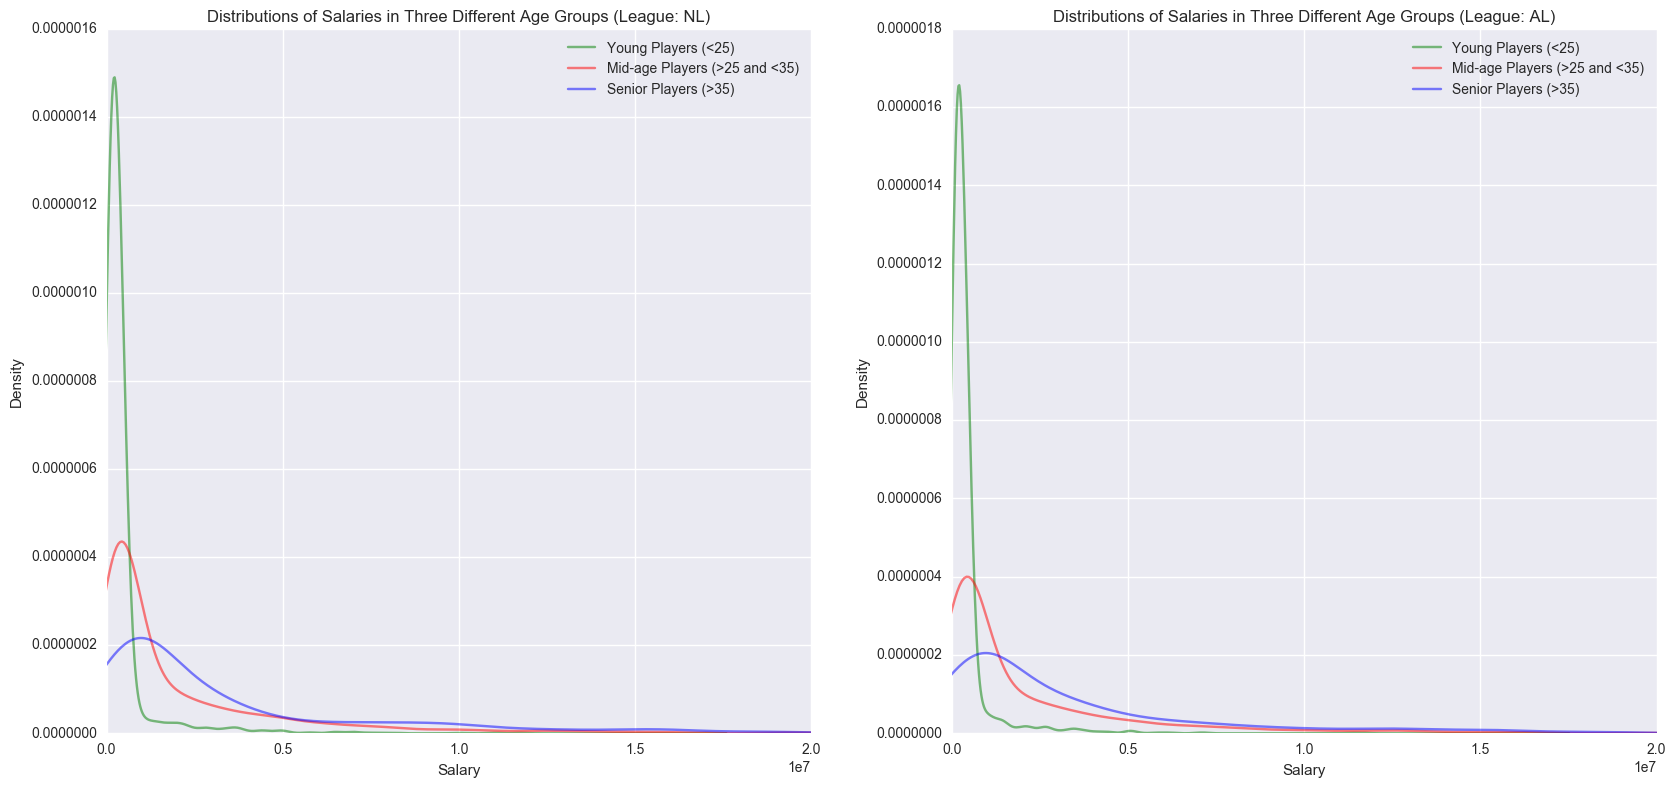

In [37]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,20))
def plot_density_of_salaries(input_df, axes,league_str,rownum,colnum):
    group_1 = input_df[input_df["player_age"]<=25]["salary"]
    group_2 = input_df[(input_df["player_age"]>25) & (input_df["player_age"]<=35)]["salary"]
    group_3 = input_df[input_df["player_age"]>35]["salary"]
    Ave_salary_youngpl = group_1.median()
    Ave_salary_midagepl = group_2.median()
    Ave_salary_oldpl = group_3.median()
    ax = axes[colnum]
    x = group_1.plot(kind='density', alpha=0.5,xlim=[0, 5e7],color="green",ax=axes[colnum])
    group_2.plot(kind='density', alpha=0.5,ax=axes[colnum],color="red",xlim=[0, 2e7])
    group_3.plot(kind='density', alpha=0.5,ax=axes[colnum],color="blue",xlim=[0, 2e7],title="Distributions of Salaries in Three Different Age Groups (League: " + league_str+")")
    ax.legend(["Young Players (<25)","Mid-age Players (>25 and <35)", "Senior Players (>35)"],loc ="best")
    ax.set_xlabel("Salary")
    ax.set_ylabel("Density")
    ax.set_aspect(1./ax.get_data_ratio())
    return(ttest_ind(group_1, group_2))

plot_density_of_salaries(salary_master_all_NL_age_bmi, axes,"NL",0,0)
plot_density_of_salaries(salary_master_all_AL_age_bmi, axes,"AL",0,1)



### Conclusions
Based on my analyses, I could make four take-away points:
    
1- The total salaries paid by teams have drastically increased over the last 30 years, indicating that there has been an increasing attention to the baseball.
2- Although the gap between highest paid player and the median salary had raised from mid 80's to early 2000, this gap has fallen since then.
3- I have also observed that the number of attendees, "supporters", has a much higher impact on the performance of the teams (measured by the number of games won by the team). In contrast, there was a relatively weak correlation between the total salaries and the team's performance. This leads me to the conclusion that supporters should be encouraged to attend.

However, we should keep in mind that this correlation does not provide the information for the cause; meaning that it could be the other way-- better performance has led to more attendees. 
4- Physical characteristics affect the salary. The important point is that regardless of the player's age, as long as the player is in good shape (e.g. reasonable BMI), the salary is high. Moreover, in general in baseball, as age increases the salary also increases, showing that probably experience is a very important factor in baseball.

As a data analyst, if I were given this data set, I would like to analyze this data to how each team should make decisions to spend their budgets to attract attendees as well as adding new players to their teams.